In [29]:
# k-Nearest Neighbors with Random Forest Feature Selection Implementation

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\rf_fs_train_data_2.csv")

In [44]:
damage_labels = [1, 2, 3]

In [45]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [46]:
print(min_count)

25124


In [47]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [48]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families,damage_grade
193748,26,1023,11319,1,0,12,3,t,r,x,v,j,s,0,0,0,1,0,1,1
1421,20,508,34,2,10,9,6,t,w,q,f,x,s,0,0,0,0,1,1,1
44906,12,179,4277,2,5,6,4,t,r,n,f,q,s,0,1,0,0,0,1,1
4035,4,1218,12185,2,30,4,4,t,r,n,f,q,s,0,1,0,0,0,1,1
114198,7,157,1320,3,0,17,10,t,i,x,v,s,s,0,0,0,0,0,1,1


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])

In [51]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families,damage_grade
193748,26,1023,11319,1,0,12,3,2,2,2,2,0,2,0,0,0,1,0,1,1
1421,20,508,34,2,10,9,6,2,4,1,0,3,2,0,0,0,0,1,1,1
44906,12,179,4277,2,5,6,4,2,2,0,0,1,2,0,1,0,0,0,1,1
4035,4,1218,12185,2,30,4,4,2,2,0,0,1,2,0,1,0,0,0,1,1
114198,7,157,1320,3,0,17,10,2,1,2,2,2,2,0,0,0,0,0,1,1


In [52]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,19].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=275)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=275)

In [55]:
y_pred = classifier.predict(X_test)


C:\Users\Brad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.52      0.48      5021
           2       0.39      0.29      0.33      5066
           3       0.40      0.44      0.42      4988

    accuracy                           0.42     15075
   macro avg       0.41      0.42      0.41     15075
weighted avg       0.41      0.42      0.41     15075



In [57]:
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']

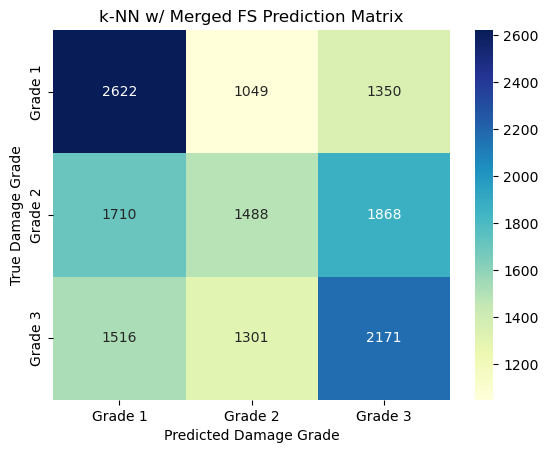

In [58]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("k-NN w/ Merged FS Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()